### Вариант: классификация 8. ricci_vs_destefano

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Познакомьтесь с возможностями библиотеки sklearn по загрузке датасетов из репозитория openml.org

#### 2. Загрузите нужный вам датасет, выведите его основные характеристики: количество строк и столбцов, типы данных, количество значений в каждом столбце, основную статистическую информацию об атрибутах.

In [4]:
from sklearn.datasets import fetch_openml
data = fetch_openml(name='ricci_vs_destefano')

In [5]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df.head()

,Position,Oral,Written,Race,Combine
0,Captain,89.52,95.0,W,92.808
1,Captain,80.00,95.0,W,89.000
2,Captain,82.38,87.0,W,85.152
3,Captain,88.57,76.0,W,81.028
4,Captain,76.19,84.0,W,80.876


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Position  118 non-null    object 
 1   Oral      118 non-null    float64
 2   Written   118 non-null    float64
 3   Race      118 non-null    object 
 4   Combine   118 non-null    float64
dtypes: float64(3), object(2)
memory usage: 4.7+ KB


In [7]:
df.shape

(118, 5)

In [8]:
df.describe().loc[['min', 'max', 'mean']]

,Oral,Written,Combine
min,40.83000,46.000000,45.932000
max,92.08000,95.000000,92.808000
mean,65.52339,71.652542,69.200881


#### 3. Прочитайте и изложите в работе общее описание датасета. Опишите, решаемую моделированием проблему.

Набор данных содержит устные, письменные и комбинированные результаты тестов для пожарного департамента Нью-Хейвена за 2003 год. вступительные экзамены. Также указаны раса и позиция для каждого тестируемого. В данных представлены три расы: белая, латиноамериканцы и черная. Можно объединить чернокожих и латиноамериканцев в качестве меньшинства для использования методов классификации.

#### 4. Удалите, если нужно, нечисловые колонки в датасете.

In [9]:
df = df.drop(['Position'], axis=1) 

In [10]:
df.loc[df["Race"] == "W", "Race"] = 1
df.loc[df["Race"] == "H", "Race"] = 0
df.loc[df["Race"] == "B", "Race"] = 0
df = df.astype({'Race': 'int32'})

Удаляем столбец с позицией, столбец с расой меняем на 0 и 1

#### 5. При необходимости заполните нулем пропущенные значения.

In [11]:
df.isna().sum(axis=0)

Oral       0
Written    0
Race       0
Combine    0
dtype: int64

Нулевых занчений нет

#### 6. Постройте гистограммы распределения по каждому признаку.

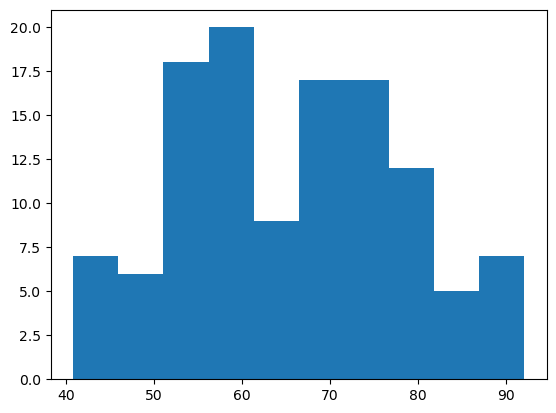

In [12]:
plt.hist(df['Oral']);

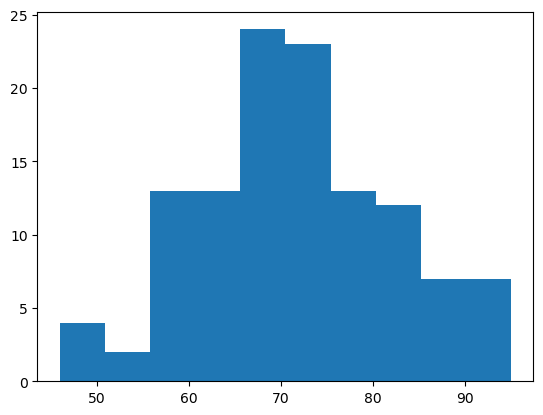

In [13]:
plt.hist(df['Written']);

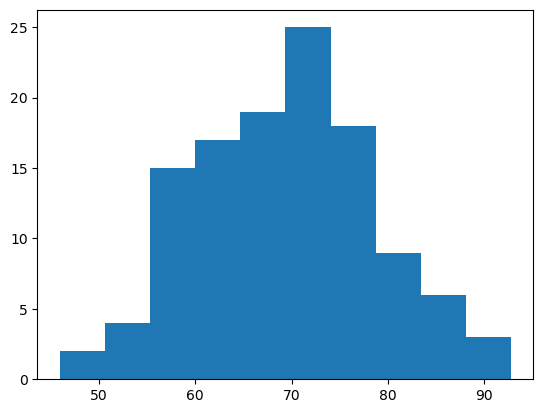

In [14]:
plt.hist(df['Combine']);

#### 7. Постройте модель машинного обучения, обучите ее на всем датасете.

In [15]:
y = df.Race
X = df.drop(["Race"], axis=1)

In [16]:
y.shape, X.shape

((118,), (118, 3))

In [17]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [18]:
logistic.fit(X, y)

LogisticRegression()

In [19]:
print("Coefficients: \n", logistic.coef_[0])

Coefficients: 
 [0.02648481 0.04841249 0.03964142]


In [20]:
_ = [print(k, v) for k, v in zip(X.columns, logistic.coef_[0])]

Oral 0.026484805593191454
Written 0.04841248919683289
Combine 0.039641415755517787


In [21]:
print("Intercept: \n", logistic.intercept_)

Intercept: 
 [-7.55847044]


In [22]:
y_pred = logistic.predict(X)

In [23]:
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

1 1
1 1
1 1
1 1
1 1
0 1
1 1
0 1
1 1
1 1


In [24]:
from sklearn import metrics
metrics.confusion_matrix(y, y_pred)

array([[29, 21],
       [13, 55]], dtype=int64)

#### 8. Измерьте эффективность данной модели и сделайте вывод о ее применимости на практике.

In [25]:
metrics.accuracy_score(y, y_pred)

0.711864406779661

In [26]:
precision = metrics.precision_score(y, y_pred)
precision

0.7236842105263158

Значение метрики показывает, что модель в среднем делает ошибки в 29% процентов случаев.

In [27]:
metrics.recall_score(y, y_pred)

0.8088235294117647

Модель выдаст верные результаты в 98% случаев, т.е. модель достаточно успешно предсказывает результаты.

#### 9. Визуализируйте результаты моделирования, сравните реальные и предсказанные значения.

Text(0.5, 23.52222222222222, 'Предсказанные значения')

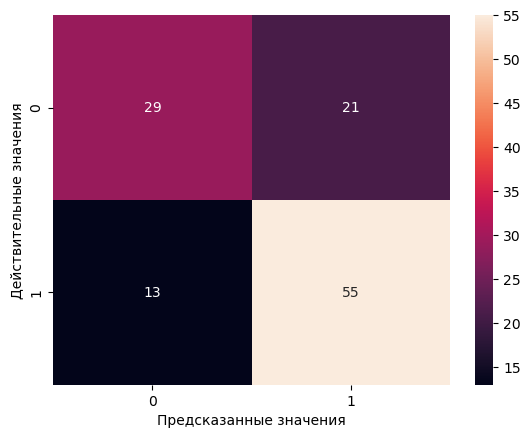

In [28]:
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

#### 10. Используйте несколько простых моделей машинного обучения. Сравните их эффективность между собой.

Метод опорных векторов

In [29]:
from sklearn import svm
clf = svm.SVC(kernel='linear')

In [30]:
clf.fit(X, y)

SVC(kernel='linear')

In [31]:
y_pred = clf.predict(X)

In [32]:
matrix = metrics.confusion_matrix(y, y_pred)
matrix

array([[29, 21],
       [14, 54]], dtype=int64)

In [33]:
accuracy = metrics.accuracy_score(y, y_pred)
accuracy

0.7033898305084746

In [34]:
precision = metrics.precision_score(y, y_pred, average="binary")
precision

0.72

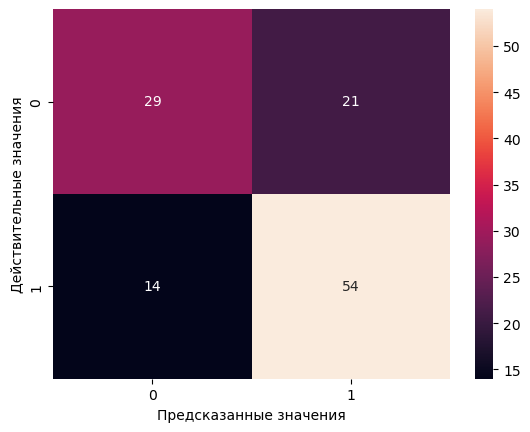

In [35]:
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(matrix),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

Метод k ближайших соседей

In [36]:
from sklearn.neighbors import KNeighborsClassifier
neighbor = KNeighborsClassifier(weights='distance')

In [37]:
neighbor.fit(X, y)

KNeighborsClassifier(weights='distance')

In [38]:
y_pred = neighbor.predict(X)

In [39]:
matrix = metrics.confusion_matrix(y, y_pred)
matrix

array([[50,  0],
       [ 1, 67]], dtype=int64)

In [40]:
accuracy = metrics.accuracy_score(y, y_pred)
accuracy

0.9915254237288136

In [41]:
precision = metrics.precision_score(y, y_pred, average="binary")
precision

1.0

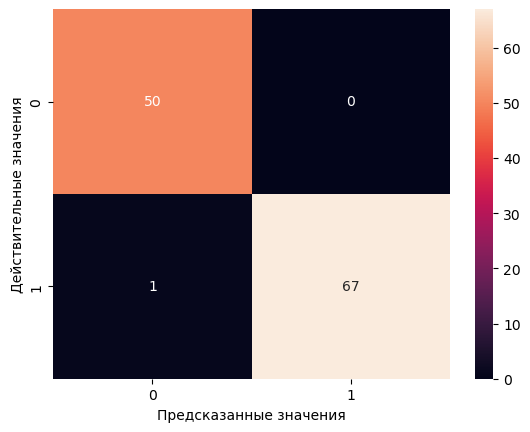

In [42]:
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(matrix),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()